#Problema del negocio

Los estudiantes de la Fundación Universitaria Maria Cano presentan dificultades a la hora de poder acceder a la información unificada de requisitos de grado como lo son:
1. Tema de prácticas
2. Trabajos de grado y sus modalidades
3. Segundo idioma
4. Cátedras abiertas
5. Pruebas Saber Pro

Esta información no está centralizada y es dificil para el estudiante poder obtenerla.

In [1]:
import matplotlib.pyplot as plt # 👈 Importando nuestra librería de visualización.
import pandas as pd # 👈 Importando nuestra librería favorita para datos estructurados.
import numpy as np # 👈 Importando numpy para algunas transformaciones específicas
import requests as req # 👈 Importando librería para obtener datos fácil y sencillo.
from math import pi
import seaborn as sns
import requests as req


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
ruta = "/content/drive/MyDrive/BOOTCAMP/Data/DATASET CSV.csv"
data = pd.read_csv(ruta)

data
print(data.shape)

(2481, 33)


In [5]:
data.head()


,TD,DOCUMENTO,LUGAR_ESPEDICION,FECHA_EXPEDICION,GENERO,NOMBRES,SEDE,PROGRAMA,FECHA_INGRESO,FECHA_MATRICULA,...,SITUACION,ESTRATO,ESTADO_CIVIL,MUNICIPIO PROCEDENCIA,DEPARTAMENTO PROCEDENCIA,REGIMEN DE SALUD,INSTITUCION_ESTUDIOS_SECUNDARIOS,OTRA_INSTITUCION,INSTITUCIÓN,OTRA_INSTITUCION.1
0,CC,1128443518,MEDELLIN,13-05-2010,F,LUISA FERNANDA ESCUDERO JIMENEZ,SEDE MEDELLIN (PRESENCIAL Y VIRTUAL),ADMINISTRACION DE EMPRESAS,26-01-2024,26-06-2025,...,ACTIVO,2.0,NaN,MEDELLIN,ANTIOQUIA,NaN,Sin Definir,Institución educativa gilberto echeverri mejía,NaN,NaN
1,CC,1025888921,SABANETA,04-12-2014,M,JUAN JOSE HERNANDEZ GARCES,SEDE MEDELLIN (PRESENCIAL Y VIRTUAL),ADMINISTRACION DE EMPRESAS,28-11-2023,26-06-2025,...,ACTIVO,3.0,Soltero,MEDELLIN,ANTIOQUIA,SURA,Sin Definir,COLEGIO DIVINO SALVADOR SEDE MEDELLIN,NaN,NO APLICA
2,CC,1146438037,NaN,NaN,M,CAMILO CAÑAVERAL GUTIERREZ,SEDE MEDELLIN (PRESENCIAL Y VIRTUAL),ADMINISTRACION DE EMPRESAS,21-01-2021,26-06-2025,...,ACTIVO,2.0,Soltero,MEDELLIN,ANTIOQUIA,NaN,Sin Definir,Institución educativa el pedregal,NaN,NO APLICA
3,CC,1151448075,NaN,NaN,F,LINA MARCELA ARIAS HERNANDEZ,SEDE MEDELLIN (PRESENCIAL Y VIRTUAL),ADMINISTRACION DE EMPRESAS,01-02-2023,26-06-2025,...,ACTIVO,3.0,Casado,GRANADA,ANTIOQUIA,NaN,Sin Definir,ferrini,NaN,NO APLICA
4,CC,1152708430,NaN,NaN,F,LEIDY CAROLINA QUICENO MONSALVE,SEDE MEDELLIN (PRESENCIAL Y VIRTUAL),ADMINISTRACION DE EMPRESAS,20-11-2023,26-06-2025,...,ACTIVO,2.0,NaN,NaN,NaN,NaN,Sin Definir,INSTITUCION EDUCATIVA JESUS REY,NaN,NaN


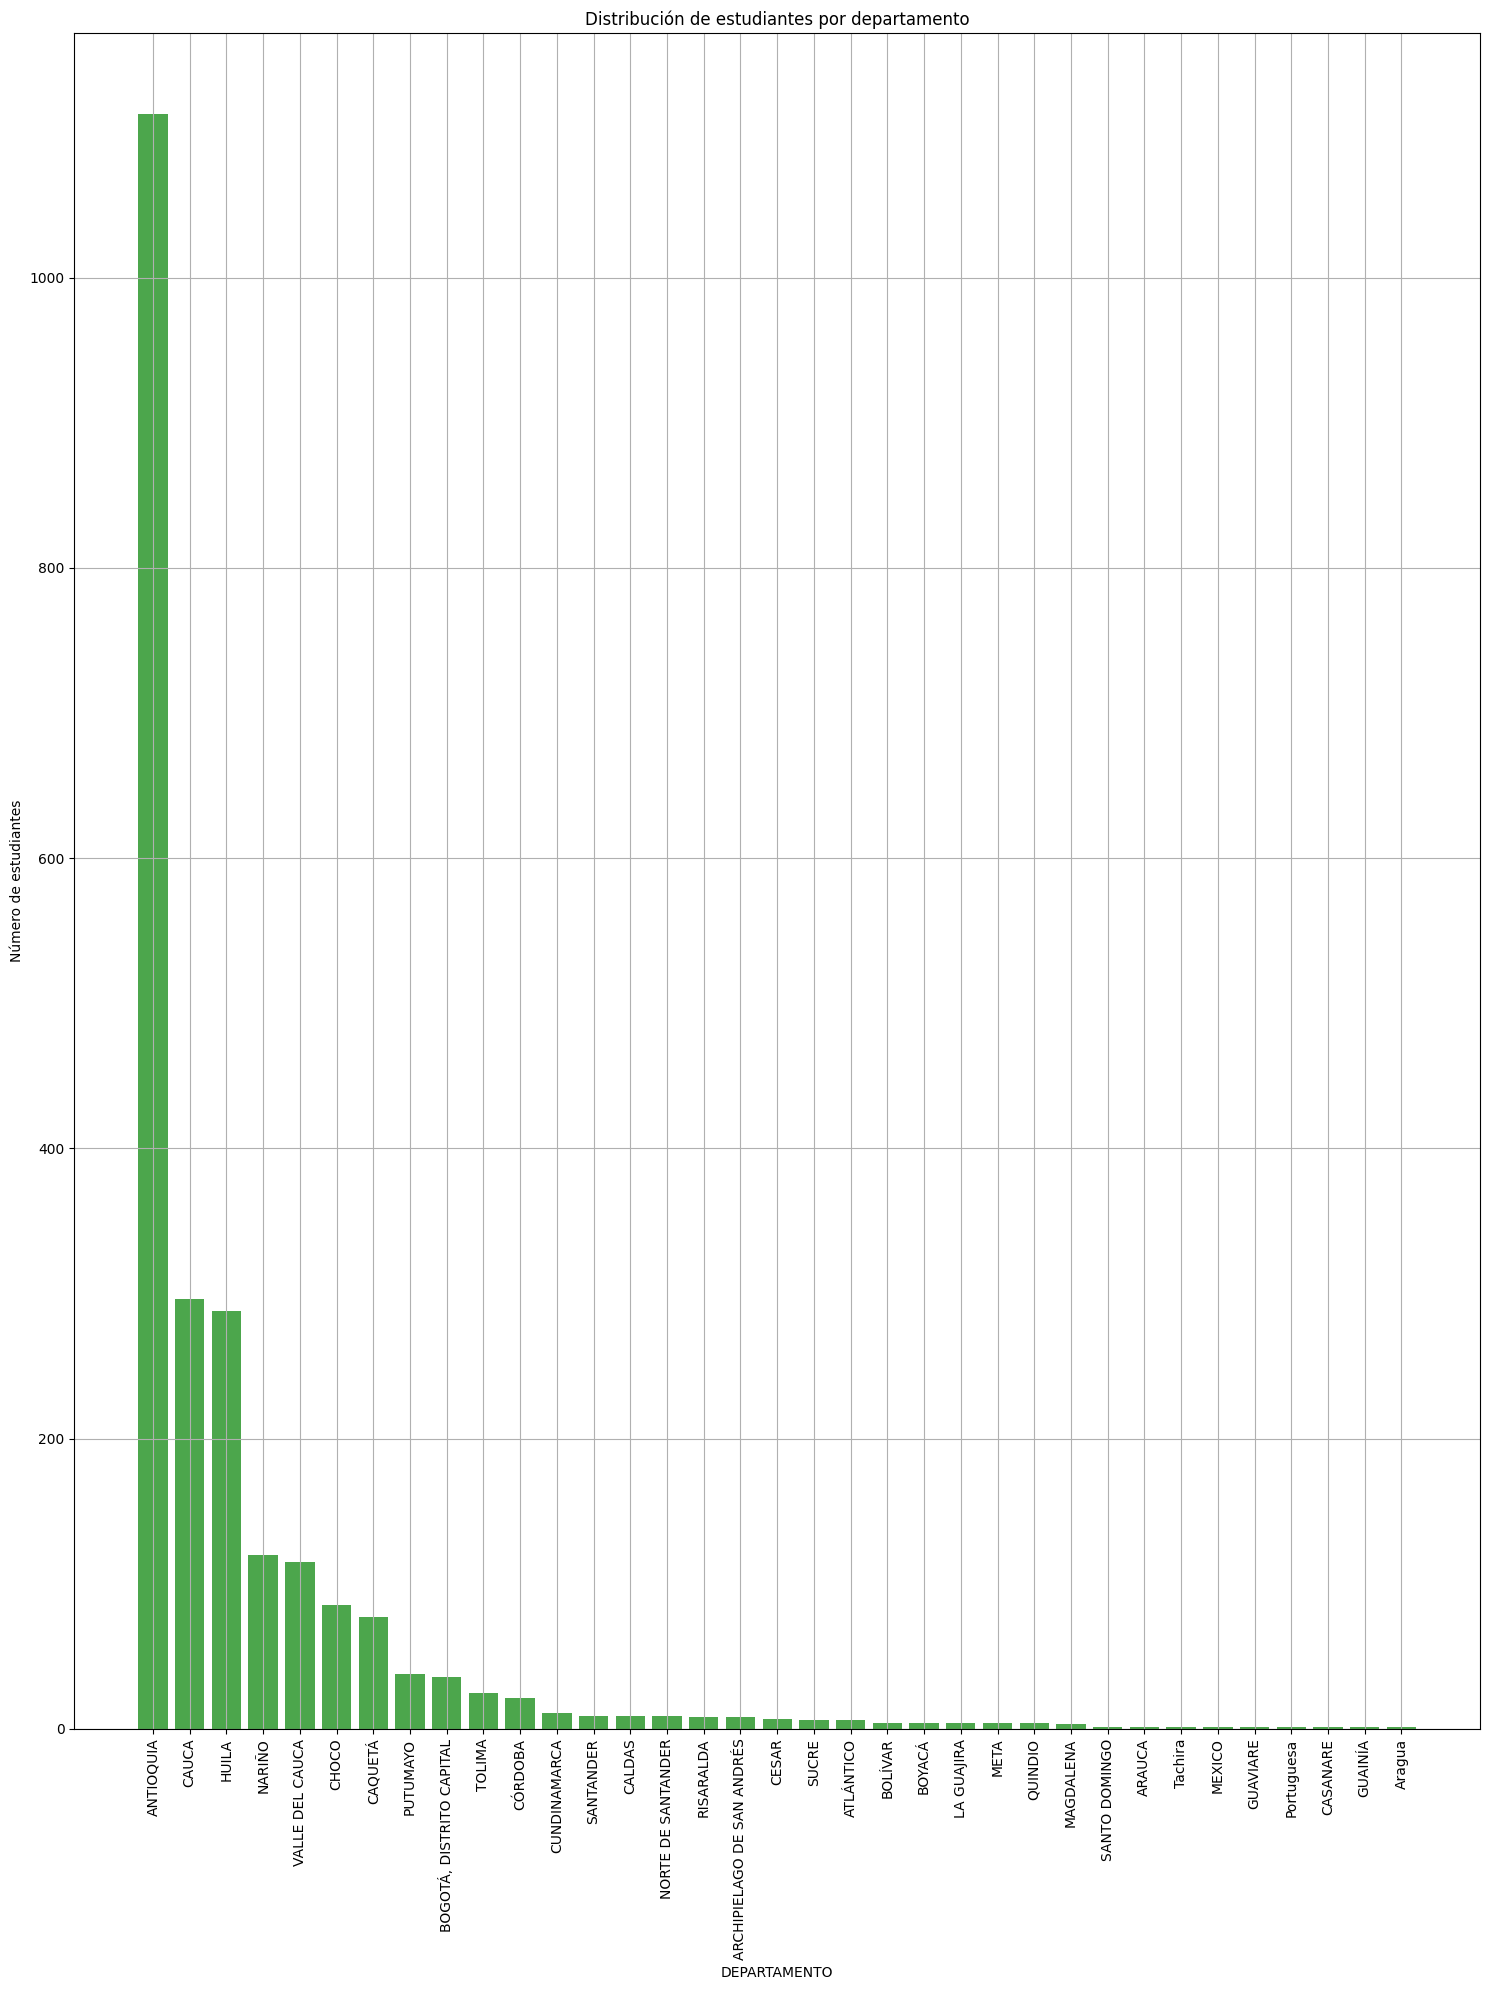

In [6]:
departmento = data["DEPARTAMENTO PROCEDENCIA"].value_counts()
plt.figure(figsize=(15, 20))
plt.bar(departmento.index, departmento.values, color="g", alpha=0.7)
plt.xlabel("DEPARTAMENTO")
plt.ylabel("Número de estudiantes")
plt.title("Distribución de estudiantes por departamento")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

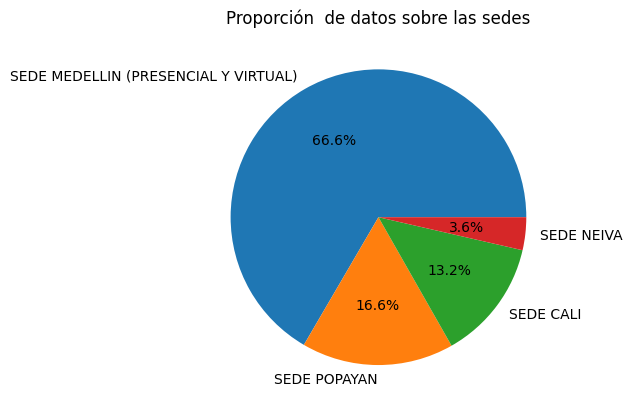

In [7]:
labels= data["SEDE"].unique()
sizes= data["SEDE"].value_counts()
plt.pie(sizes,labels=labels, autopct="%1.1f%%")
plt.title("Proporción  de datos sobre las sedes")
plt.show()

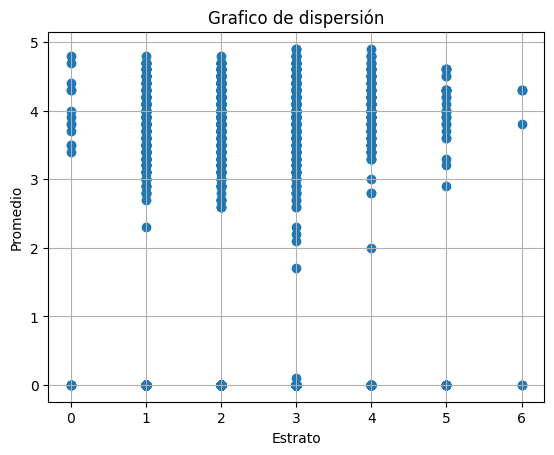

In [8]:
x, y =data["ESTRATO"],data["PROMEDIO"]
plt.scatter(x,y)
plt.xlabel("Estrato")
plt.ylabel("Promedio")
plt.title("Grafico de dispersión")
plt.grid(True)
plt.show()

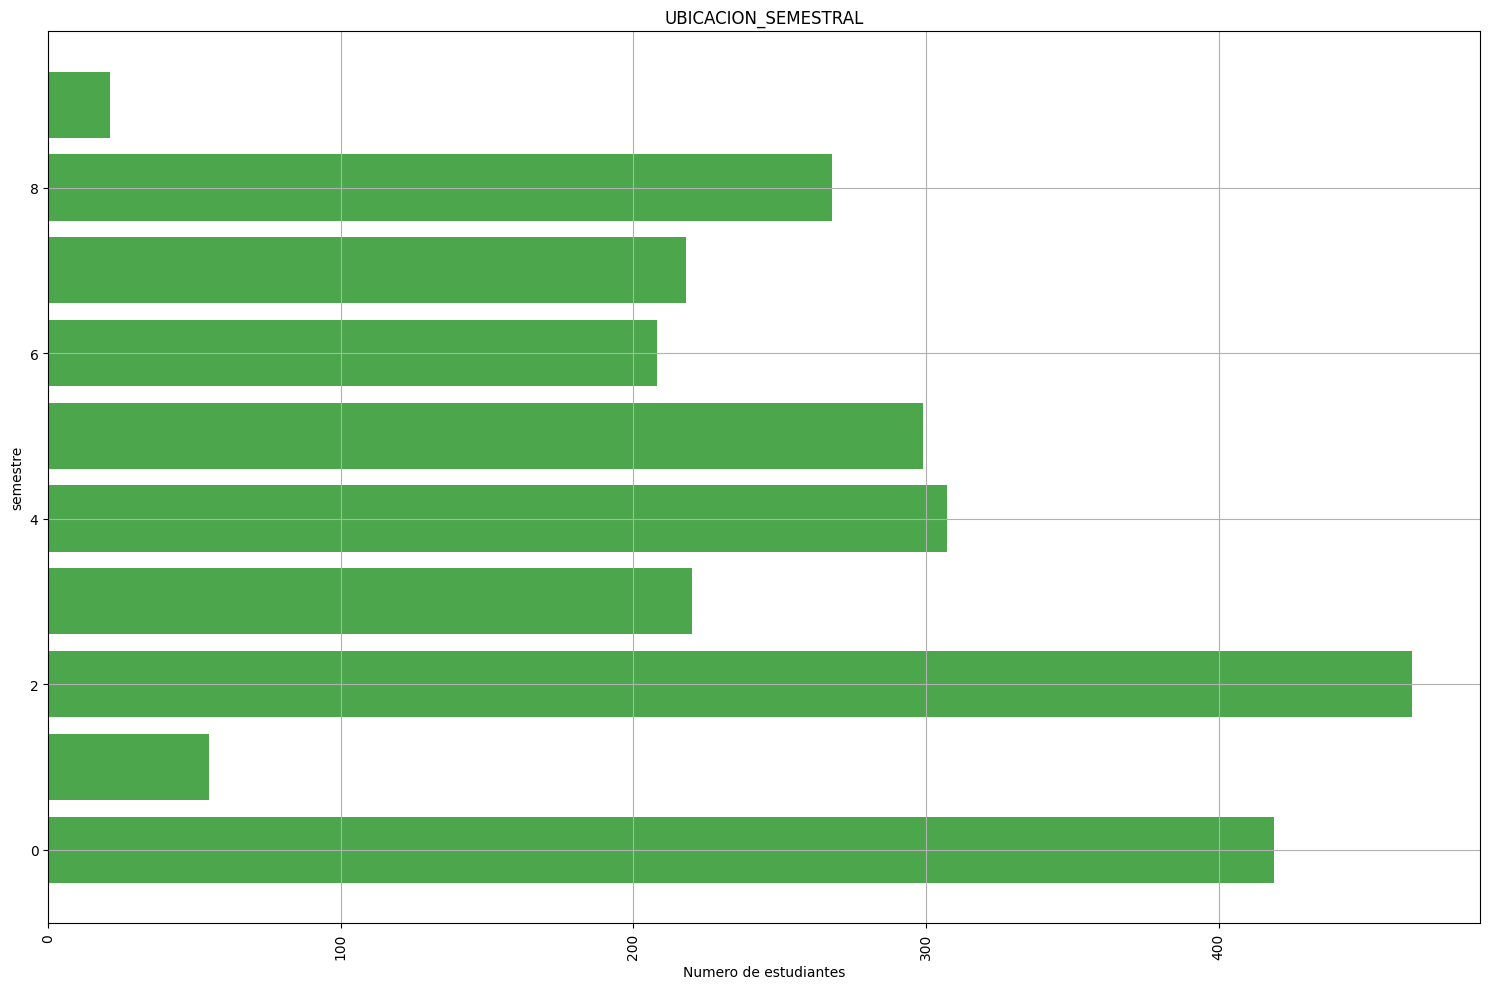

In [9]:
UBICACION_SEMESTRAL = data["UBICACION_SEMESTRAL"].value_counts()
plt.figure(figsize=(15, 10))
plt.barh(UBICACION_SEMESTRAL.index, UBICACION_SEMESTRAL.values, color="g", alpha=0.7)
plt.xlabel("Numero de estudiantes")
plt.ylabel("semestre")
plt.title("UBICACION_SEMESTRAL")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-2802782506.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(UBICACION_SEMESTRAL, shade=True, color="blue")


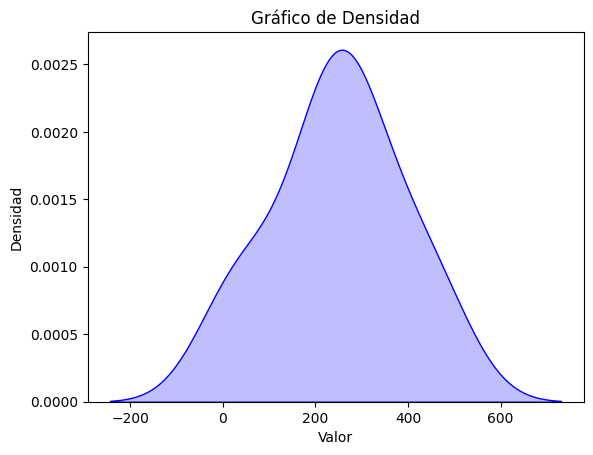

In [10]:
UBICACION_SEMESTRAL = data["UBICACION_SEMESTRAL"].value_counts()
sns.kdeplot(UBICACION_SEMESTRAL, shade=True, color="blue")

# Etiquetas en español
plt.title("Gráfico de Densidad")
plt.xlabel("Valor")
plt.ylabel("Densidad")

# Mostrar gráfico
plt.show()


In [ ]:
import folium

# Crear mapa centrado en Europa
mapa = folium.Map(location=[50, 15], zoom_start=4, tiles='OpenStreetMap')

# Agregar marcadores fijos como tenías antes
lugares = [
    {"nombre":"Popayan","lat": 2.4382, "lon": -76.6132},
    {"nombre":"Medellín","lat": 6.2492, "lon": -75.6068},
    {"nombre": "Cali", "lat": 3.4372, "lon": -76.5225},
    {"nombre": "Neiva", "lat": 2.9304, "lon": -75.3302}]

for lugar in lugares:
    folium.Marker(
        location=[lugar["lat"], lugar["lon"]],
        popup=lugar["nombre"],
        icon=folium.Icon(color='red')
    ).add_to(mapa)

# Activar detección de clics para mostrar latitud/longitud
mapa.add_child(folium.LatLngPopup())

# Mostrar mapa
mapa

In [ ]:
import plotly.express as px

fig = px.scatter(data, x='SEDE', y='PROGRAMA', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0,))
fig.show()

In [ ]:
data_cleaned = data.dropna(subset=['PROMEDIO'])

fig = px.scatter_3d(data_cleaned, x='PROMEDIO', y='SEDE', z='ESTRATO',
              size='PROMEDIO', size_max=18,
              opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()